In [43]:
from scipy.integrate import quad
from scipy.fft import fft, fftfreq
from matplotlib import pylab as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [44]:
c = pow(10, -6)
T = 0.5 * c

In [45]:
def s(t):
    a = 1
    b = -0.5
    if 0 <= t <= T: return a*t + b
    else: return 0

1. Построить график аналогового сигнала.

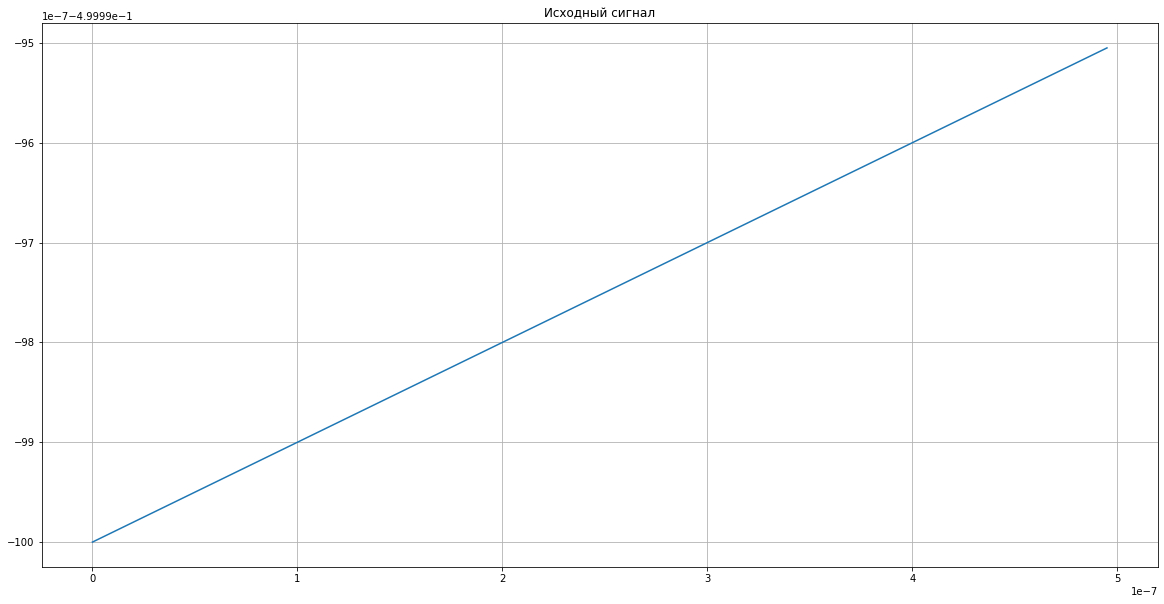

In [46]:
x = [i for i in np.arange(0, T, T/100)]
y = [s(i) for i in x]
plt.figure(figsize=(20, 10))
plt.title("Исходный сигнал")
plt.grid(True)
plt.plot(x, y)
plt.show()

2. Определить граничную частоту (верхнюю частоту) аналогового сигнала.

In [47]:
def s2(t):
    return s(t)**2

Ec = quad(s2, 0, T)[0]
Ec

1.2499987500004168e-07

In [48]:
def sCos(t, w):
    return s(t) * np.cos(t * w)

def Aw(w):
    return quad(sCos, 0, T, args=(w))[0]

In [49]:
def sSin(t, w):
    return s(t) * np.sin(t * w)

def Bw(w):
    return quad(sSin, 0, T, args=(w))[0]

In [50]:
def Sw(w):
    return np.sqrt(pow(Aw(w), 2) + pow(Bw(w), 2))

def Sw2(w):
    return pow(Sw(w), 2)

In [51]:
Ew = 0
f = 1 / T
w1 = 2 * np.pi * f
wmax = 0
while Ew / Ec <= 0.95:
    Ew = (1 / np.pi) * quad(Sw2, 0, wmax)[0]
    wmax += w1 / 20
print("Граничная частота: ", int(wmax), 'Гц\nРазница: ', np.round(Ew / Ec, 3), '%')

Граничная частота:  27017696 Гц
Разница:  0.95 %


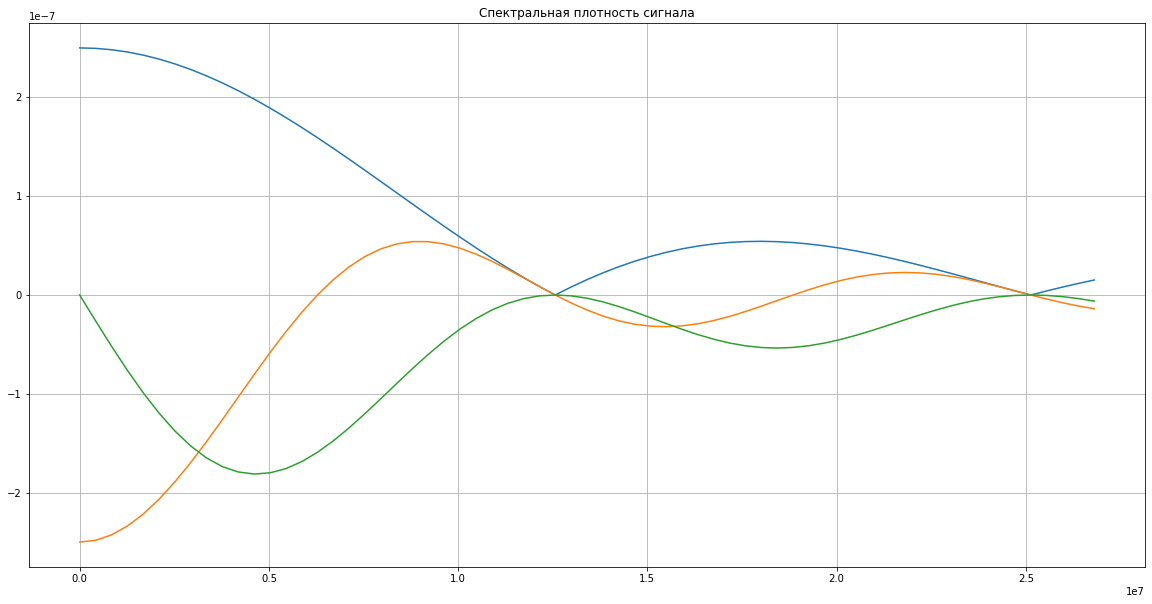

In [52]:
x = [i for i in np.arange(0, wmax, w1/30)]
y = [Sw(i) for i in x]
y2 = [Aw(i) for i in x]
y3 = [Bw(i) for i in x]
plt.figure(figsize=(20, 10))
plt.grid(True)
plt.title("Спектральная плотность сигнала")
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

3. Определить частоту дискретизации аналогового сигнала

In [53]:
fd = 2 * wmax
print('Частота дискретизации аналогового сигнала:', int(fd), 'Гц')

Частота дискретизации аналогового сигнала: 54035393 Гц


4. Сгенерировать дискретный сигнал в виде массива чисел и построить его график

In [54]:
Td = 1/fd
print('Шаг дискретизации:', Td)

Шаг дискретизации: 1.8506388731615756e-08


In [55]:
N = int(1 + T/Td)
if N % 2 != 0: N += 1
print('Количество отсчетных значений:', N)

Количество отсчетных значений: 28


In [56]:
Td2 = T / (N - 1)
print('Шаг дискретизации (по выбранному значению отсчетов):', Td2)

Шаг дискретизации (по выбранному значению отсчетов): 1.8518518518518518e-08


In [57]:
Sd = []
i = 0
while i < 28:
    Sd.append([i*Td2, s(i*Td2)])
    i += 1
Sd

[[0.0, -0.5],
 [1.8518518518518518e-08, -0.4999999814814815],
 [3.7037037037037036e-08, -0.49999996296296295],
 [5.5555555555555555e-08, -0.49999994444444446],
 [7.407407407407407e-08, -0.4999999259259259],
 [9.259259259259259e-08, -0.4999999074074074],
 [1.1111111111111111e-07, -0.4999998888888889],
 [1.2962962962962961e-07, -0.49999987037037036],
 [1.4814814814814815e-07, -0.49999985185185186],
 [1.6666666666666668e-07, -0.4999998333333333],
 [1.8518518518518518e-07, -0.4999998148148148],
 [2.0370370370370369e-07, -0.4999997962962963],
 [2.2222222222222222e-07, -0.49999977777777777],
 [2.4074074074074075e-07, -0.49999975925925927],
 [2.5925925925925923e-07, -0.4999997407407407],
 [2.7777777777777776e-07, -0.4999997222222222],
 [2.962962962962963e-07, -0.4999997037037037],
 [3.148148148148148e-07, -0.49999968518518517],
 [3.3333333333333335e-07, -0.4999996666666667],
 [3.5185185185185183e-07, -0.4999996481481481],
 [3.7037037037037036e-07, -0.4999996296296296],
 [3.888888888888889e-07

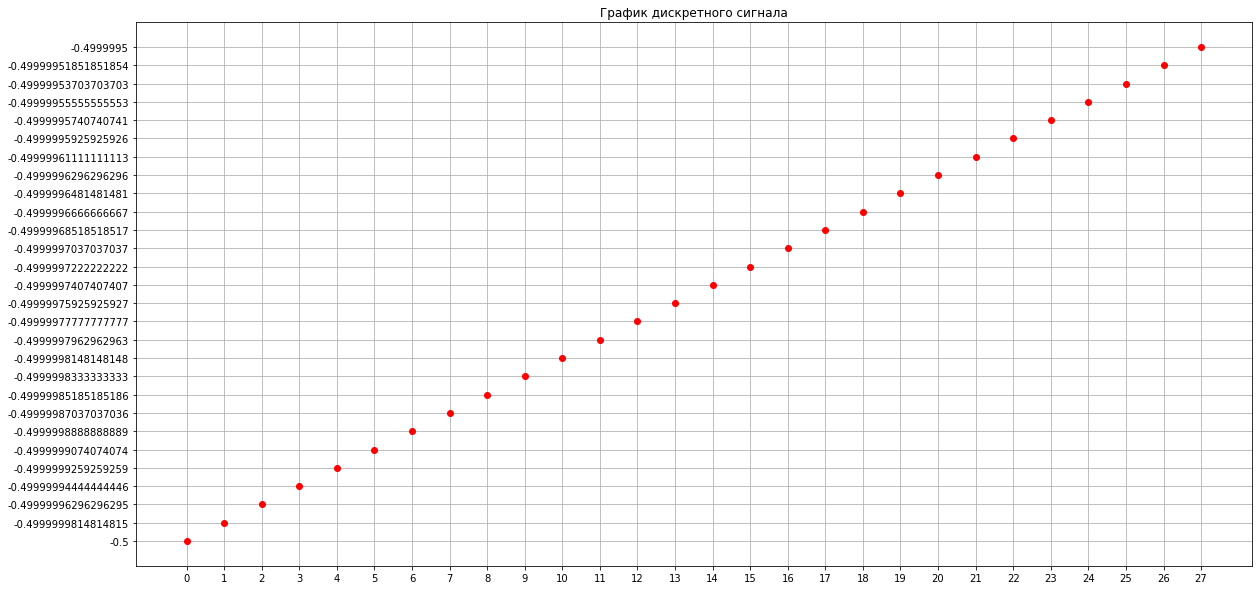

In [58]:
n = [i for i in range(N)]
y = [i[1] for i in Sd]
plt.figure(figsize=(20, 10))
plt.title('График дискретного сигнала')
plt.yticks(y,y)
plt.xticks(n, n)
plt.grid(True)
plt.plot(n, y, 'ro')
plt.show()

5. Выполнить квантование дискретного сигнала с шагом, соответствующим представлению отсчетов 4-битным числом

In [59]:
M = pow(2, 4)
print('Количество уровней квантования:', M)

Количество уровней квантования: 16


In [60]:
#y = [s(i) for i in np.arange(-0.5*T, 1.5*T, T/100)]
y = [s(i) for i in np.arange(0, T, T/100)]
ymax = np.max(y)
ymin = np.min(y)
delta = (ymax - ymin)/(M - 1)
print('Шаг квантования:', delta)

Шаг квантования: 3.29999999992836e-08


In [61]:
n = [i for i in range(N)]
yd = [int(np.round(Sd[i][1] / delta)) for i in n]
ydmax = int(np.round(ymax / delta))
ydmin = int(np.round(ymin / delta))
[delta*i for i in yd]

[-0.49999999498914544,
 -0.49999999498914544,
 -0.4999999619891454,
 -0.49999992898914547,
 -0.49999992898914547,
 -0.49999989598914546,
 -0.49999989598914546,
 -0.49999986298914545,
 -0.49999986298914545,
 -0.49999982998914544,
 -0.49999982998914544,
 -0.49999979698914543,
 -0.4999997639891455,
 -0.4999997639891455,
 -0.49999973098914546,
 -0.49999973098914546,
 -0.49999969798914545,
 -0.49999969798914545,
 -0.49999966498914544,
 -0.49999963198914543,
 -0.49999963198914543,
 -0.4999995989891455,
 -0.4999995989891455,
 -0.49999956598914547,
 -0.49999956598914547,
 -0.49999953298914546,
 -0.49999953298914546,
 -0.49999949998914545]

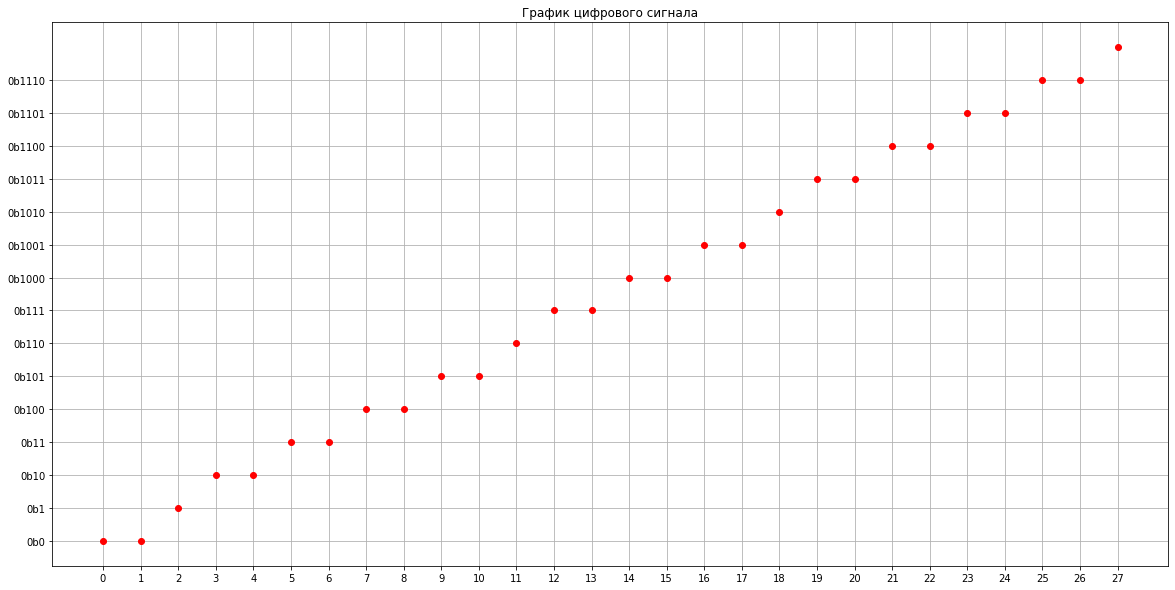

In [62]:
x = [bin(i) for i in range(M-1)]
plt.figure(figsize=(20, 10))
plt.yticks(range(ydmin, ydmax, 1), x)
plt.title("График цифрового сигнала")
plt.xticks(n, n)
plt.grid(True)
plt.plot(n, yd, 'ro')
plt.show()

6. Вычислить погрешность квантования. Построить график погрешности.

7. Найти коэффициенты ДПФ.

In [63]:
def Ck(n):
    c_Re = 0
    c_Im = 0
    for k in range(N):
        c_Re += Sd[k][1] * np.cos((2 * np.pi * n * k) / N)
        c_Im += Sd[k][1] * np.sin((2 * np.pi * n * k) / N)
    return (1/N) * c_Re, -(1/N) * c_Im

In [64]:
C = [[Ck(i)] for i in range(N)]
C

[[(-0.49999974999999997, -0.0)],
 [(-9.259259238304982e-09, 8.217819888616171e-08)],
 [(-9.259259232357359e-09, 4.0567465490034693e-08)],
 [(-9.259259222444653e-09, 2.6461442646190973e-08)],
 [(-9.259259386995566e-09, 1.922704990260054e-08)],
 [(-9.259259277955804e-09, 1.4736026748047541e-08)],
 [(-9.259259312650274e-09, 1.1610743888160587e-08)],
 [(-9.259259527971301e-09, 9.259259275973264e-09)],
 [(-9.259259534199243e-09, 7.384012796049103e-09)],
 [(-9.259259204601783e-09, 5.817978251942968e-09)],
 [(-9.259259224427195e-09, 4.459024403681764e-09)],
 [(-9.259259363205073e-09, 3.239954917450787e-09)],
 [(-9.259259107457268e-09, 2.1133657809868645e-09)],
 [(-9.259259281920886e-09, 1.0432679447518784e-09)],
 [(-9.259259258130394e-09, -3.282511288903652e-17)],
 [(-9.259259182793831e-09, -1.0432679953066767e-09)],
 [(-9.259259490087703e-09, -2.1133650791673097e-09)],
 [(-9.259259587232218e-09, -3.239954955119068e-09)],
 [(-9.259258766460197e-09, -4.459024371961107e-09)],
 [(-9.259259487113

8. Восстановить аналоговый сигнал по значениям цифрового сигнала.

In [65]:
def Cm(n):
    c_Re, c_Im = Ck(n)
    return np.sqrt(c_Re**2 + c_Im**2)

In [66]:
def fi(n):
    a = 0
    c_Re, c_Im = Ck(n)
    if c_Re > 0: a = np.arctan(c_Im/c_Re)
    if c_Re < 0 and c_Im > 0: a = np.pi + np.arctan(c_Im/c_Re)
    if c_Re < 0 and c_Im < 0: a = -np.pi + np.arctan(c_Im/c_Re)
    return a

In [67]:
def xt(t):
    x, _ = Ck(0)
    for k in range(1, int(N/2)):
        x += 2 * Cm(k) * np.cos((k * 2 * np.pi * t) / T + fi(k))
    x += Cm(N / 2) * np.cos((N * np.pi * t) / T + fi(N / 2))
    return x

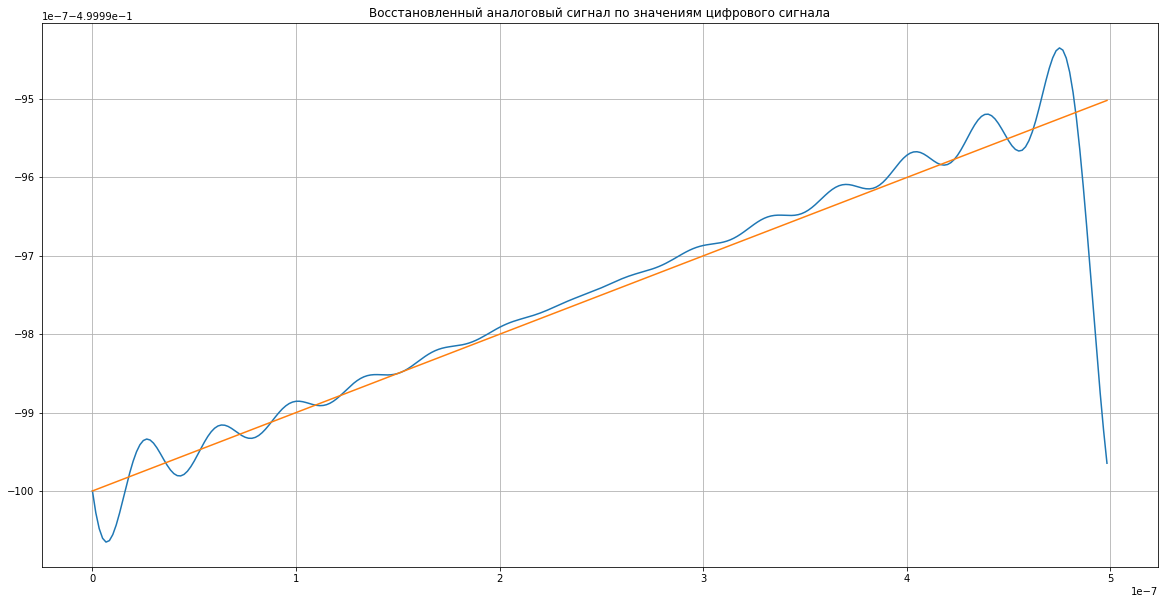

In [68]:
x = [i for i in np.arange(0, T, T/300)]
y = [xt(i) for i in x]
y2 = [s(i) for i in x]
plt.figure(figsize=(20, 10))
plt.title('Восстановленный аналоговый сигнал по значениям цифрового сигнала')
plt.plot(x, y)
plt.grid(True)
plt.plot(x, y2)
plt.show()